In [1]:
#import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [4]:
cat_features=df.select_dtypes(include='object').columns
num_features = df.select_dtypes(exclude='object').columns

In [5]:
df[cat_features].describe()

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


In [6]:
df[num_features].describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df['drivers_per_rider'] = df['Number_of_Riders']/df['Number_of_Drivers']

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,drivers_per_rider
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.000000
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.487179
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.354839
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.178571
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.545455


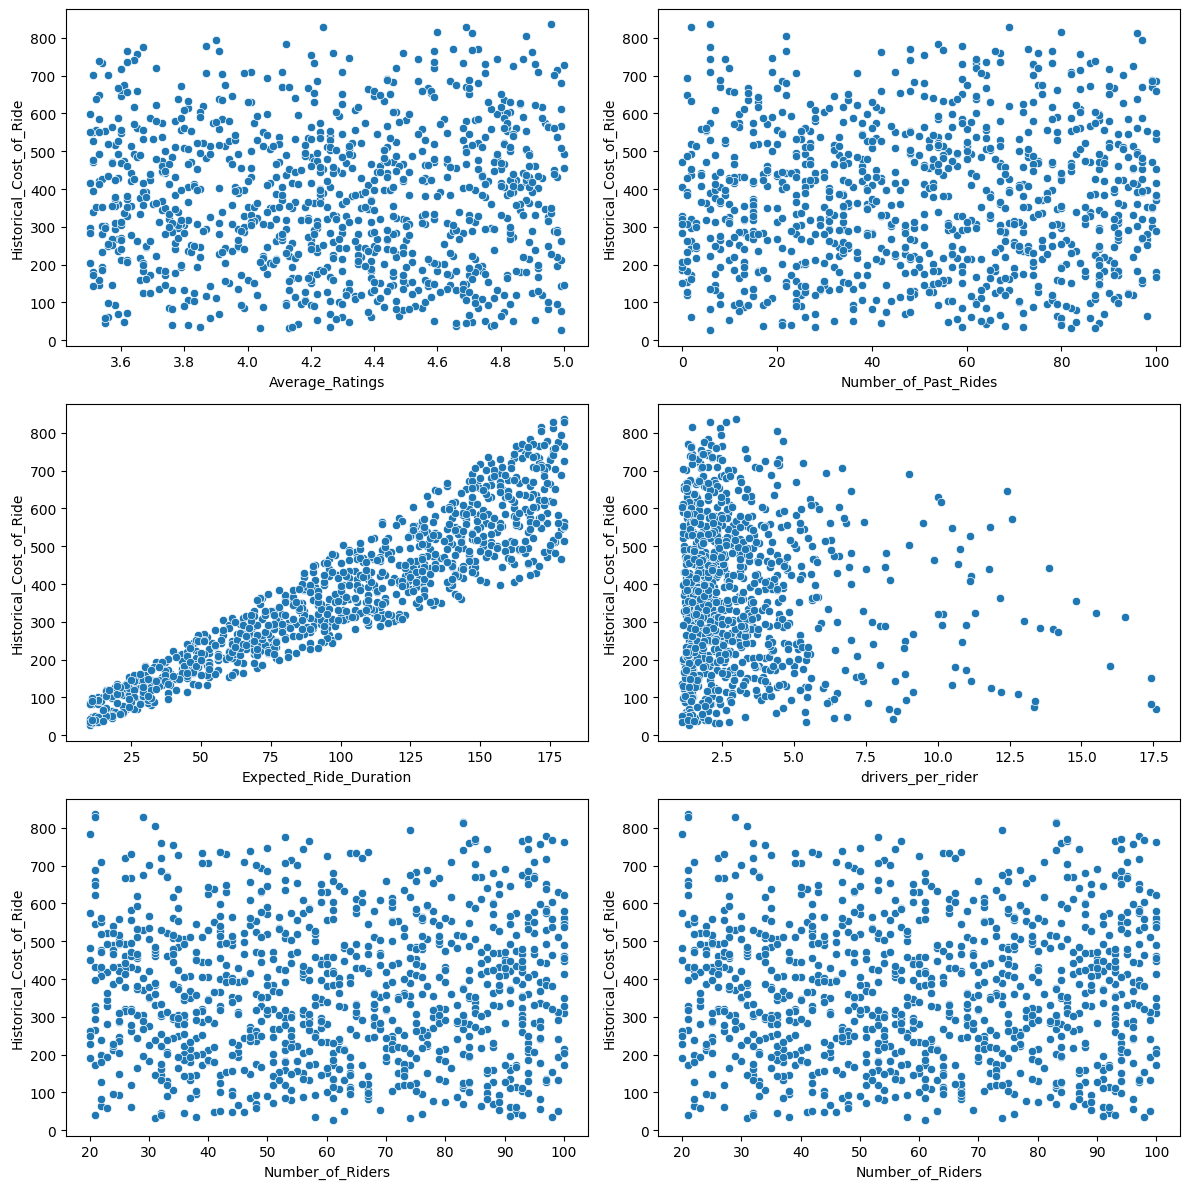

In [8]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Distribution plots
sns.scatterplot(x=df['Average_Ratings'],y=df['Historical_Cost_of_Ride'], ax=ax1) 
sns.scatterplot(x=df['Number_of_Past_Rides'],y=df['Historical_Cost_of_Ride'], ax=ax2) 
sns.scatterplot(x=df['Expected_Ride_Duration'],y=df['Historical_Cost_of_Ride'], ax=ax3) 
sns.scatterplot(x=df['drivers_per_rider'],y=df['Historical_Cost_of_Ride'], ax=ax4) 
sns.scatterplot(x=df['Number_of_Riders'],y=df['Historical_Cost_of_Ride'], ax=ax5) 
sns.scatterplot(x=df['Number_of_Riders'],y=df['Historical_Cost_of_Ride'], ax=ax6) 
# fig.set_title('Distribution of continuous variables ')
fig.tight_layout()
plt.show()


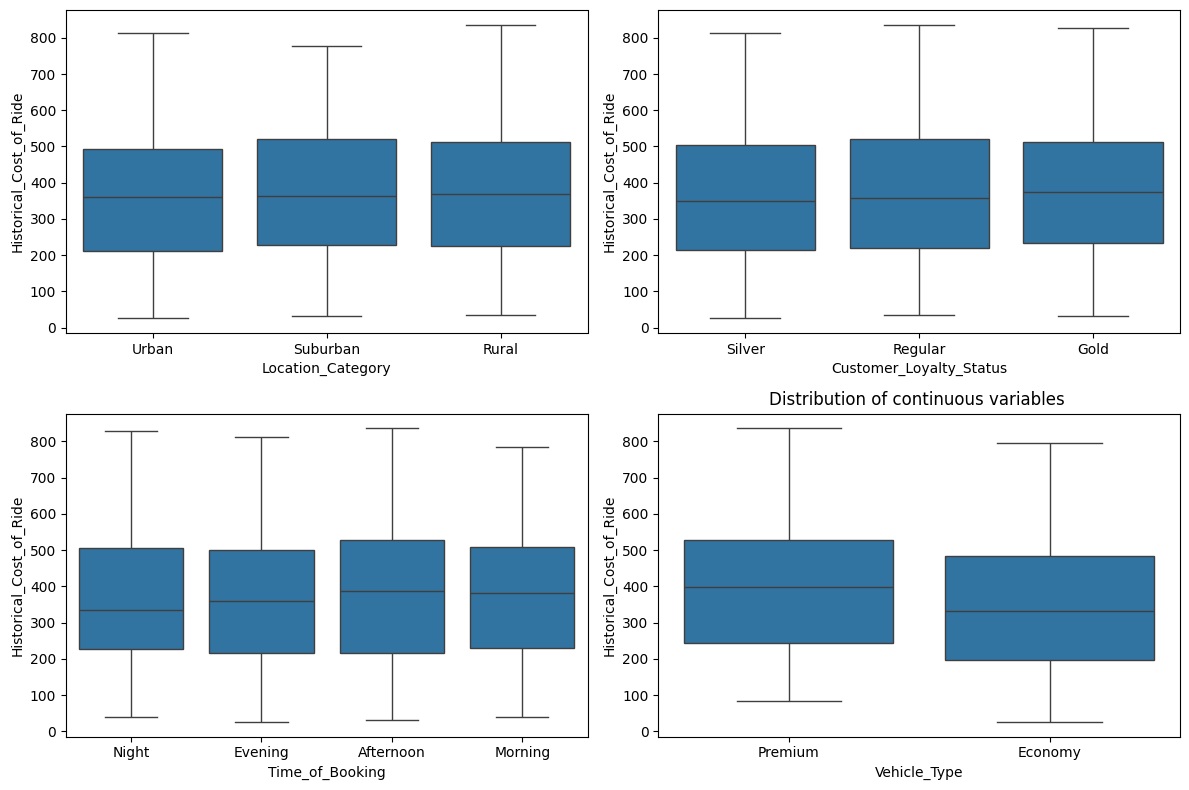

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution plots
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Location_Category'], ax=ax1) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Customer_Loyalty_Status'], ax=ax2) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Time_of_Booking'], ax=ax3) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Vehicle_Type'], ax=ax4) 



plt.title('Distribution of continuous variables ')
fig.tight_layout()
plt.show()

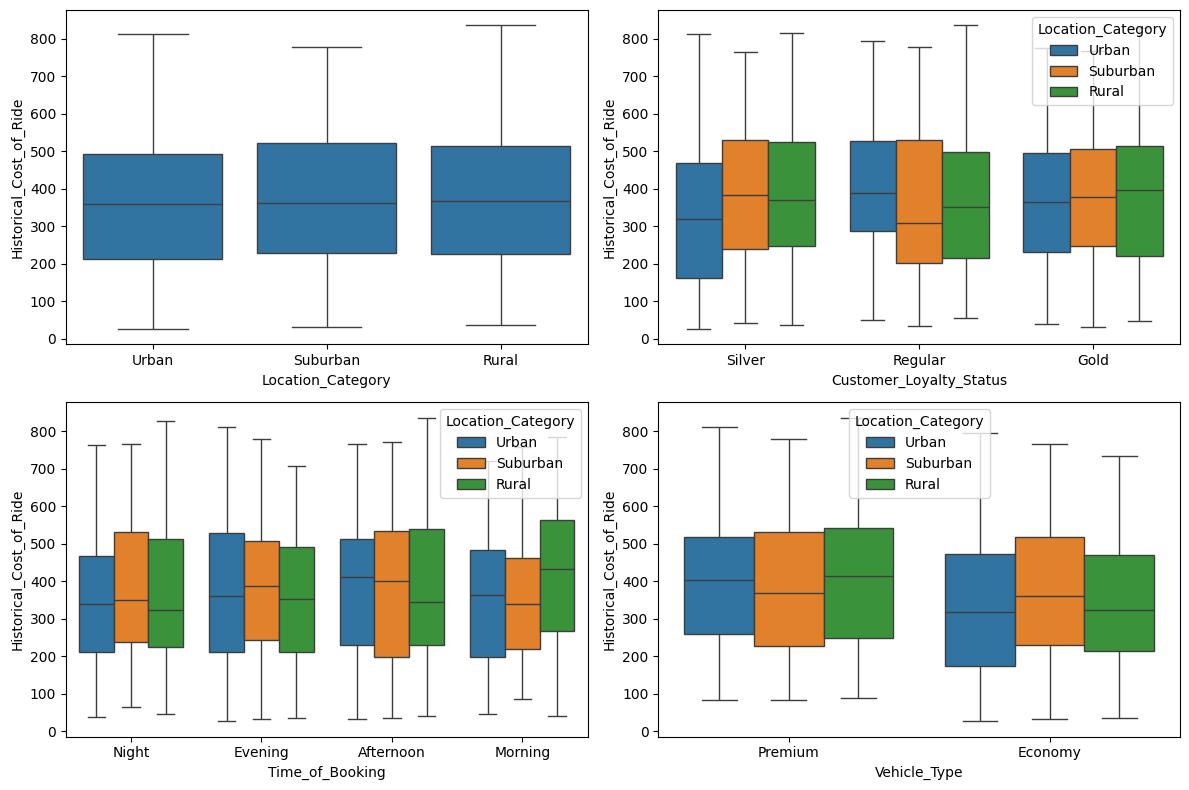

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution plots
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Location_Category'], ax=ax1) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Customer_Loyalty_Status'],hue=df['Location_Category'], ax=ax2) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Time_of_Booking'],hue=df['Location_Category'], ax=ax3) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Vehicle_Type'],hue=df['Location_Category'], ax=ax4) 



# fig.set_title('Distribution of continuous variables ')
fig.tight_layout()
plt.show()

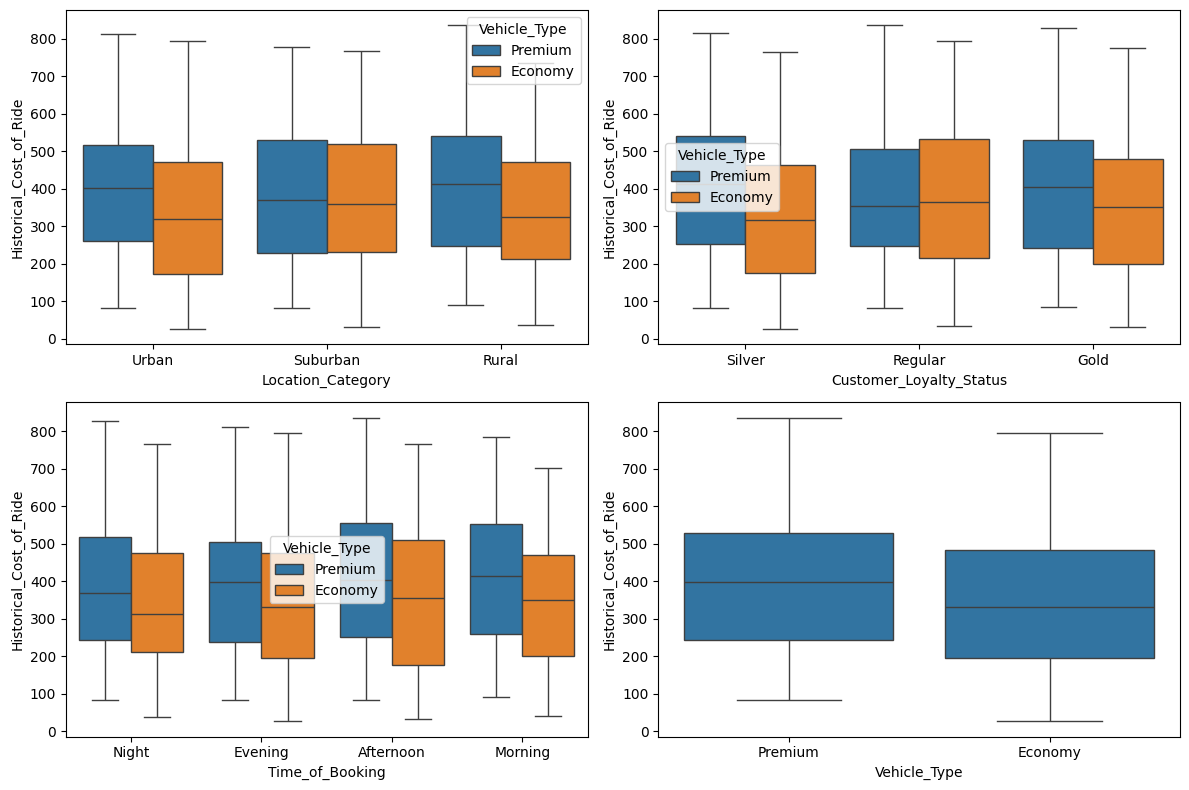

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution plots
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Location_Category'],hue=df['Vehicle_Type'], ax=ax1) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Customer_Loyalty_Status'],hue=df['Vehicle_Type'], ax=ax2) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Time_of_Booking'],hue=df['Vehicle_Type'], ax=ax3) 
sns.boxplot(y=df['Historical_Cost_of_Ride'],x=df['Vehicle_Type'], ax=ax4) 



# fig.set_title('Distribution of continuous variables ')
fig.tight_layout()
plt.show()


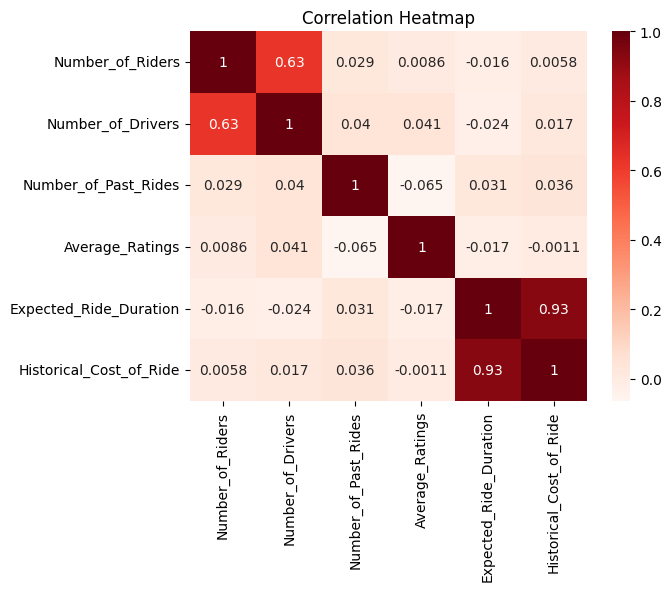

In [12]:
sns.heatmap(df[num_features].corr(),annot=True,cmap='Reds')
plt.title('Correlation Heatmap');

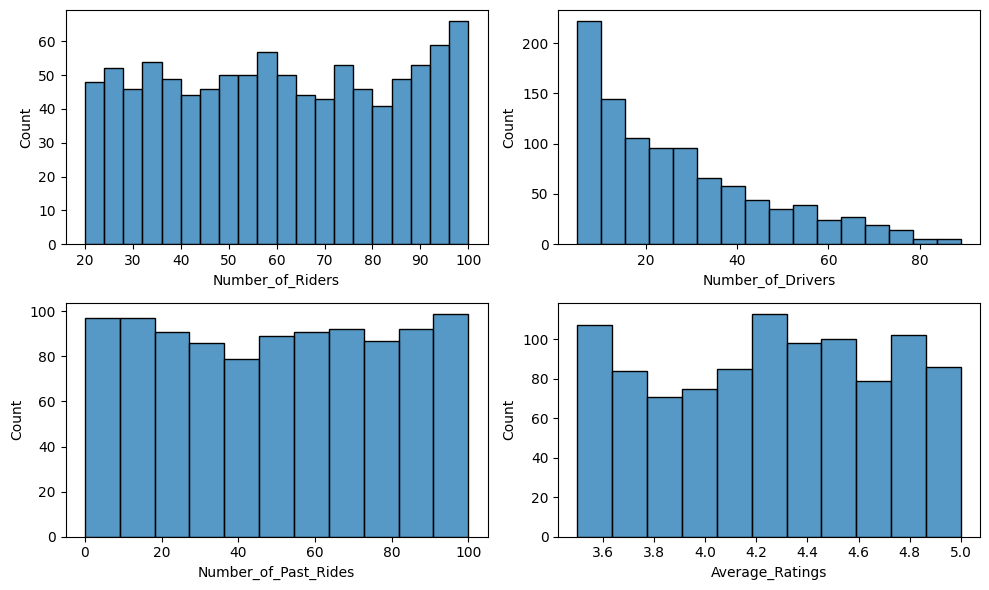

In [13]:
# Distribution of continuous variables 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Distribution plots
sns.histplot(df['Number_of_Riders'], ax=ax1,bins=20) 
sns.histplot(df['Number_of_Drivers'], ax=ax2)
sns.histplot(df['Number_of_Past_Rides'], ax=ax3)  
sns.histplot(df['Average_Ratings'], ax=ax4)

# fig.set_title('Distribution of continuous variables ')
fig.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14776\1354751839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c_counts.index, y=c_counts.values, palette='GnBu')
C:\Users\User\AppData\Local\Temp\ipykernel_14776\1354751839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c_counts.index, y=c_counts.values, palette='GnBu')
C:\Users\User\AppData\Local\Temp\ipykernel_14776\1354751839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c_counts.index, y=c_counts.values, palette='GnBu')
C:\Users\User\AppData\Local\Temp\ipykernel_14776\135

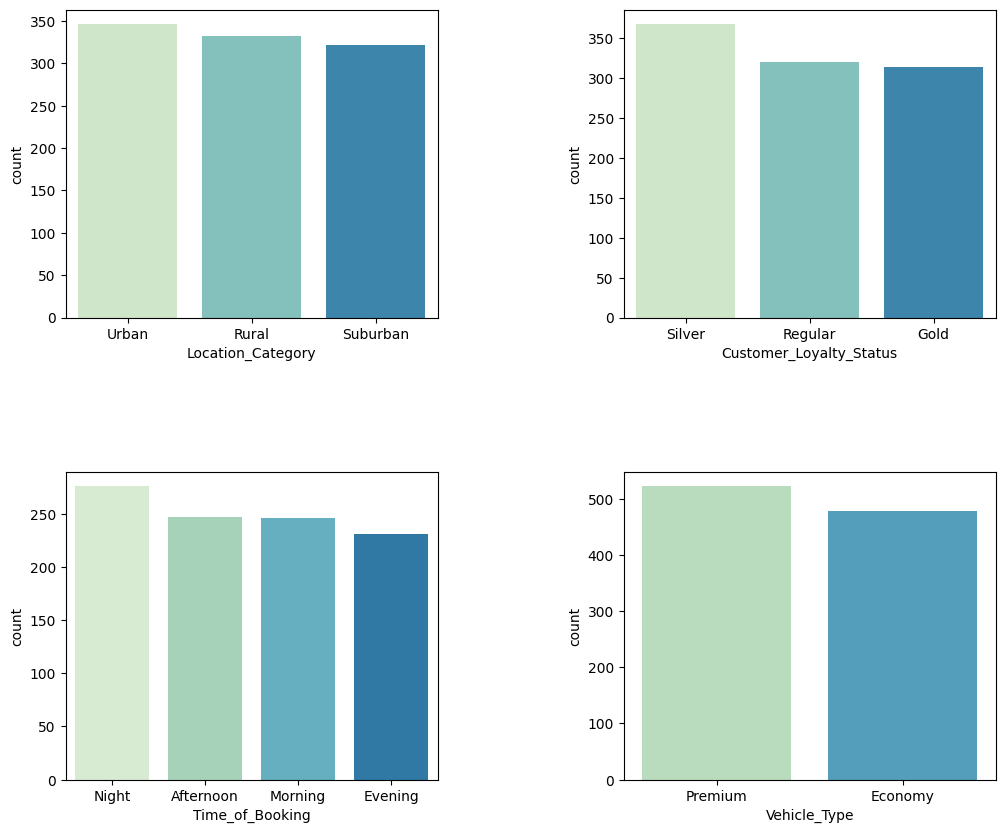

In [14]:
plt.figure(figsize=(12, 10))

for i, c in enumerate(cat_features, 1):
        plt.subplot(2,2,i)
        c_counts = df[c].value_counts()
        
        sns.barplot(x=c_counts.index, y=c_counts.values, palette='GnBu')
        plt.xlabel(c)
        plt.ylabel('count')
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

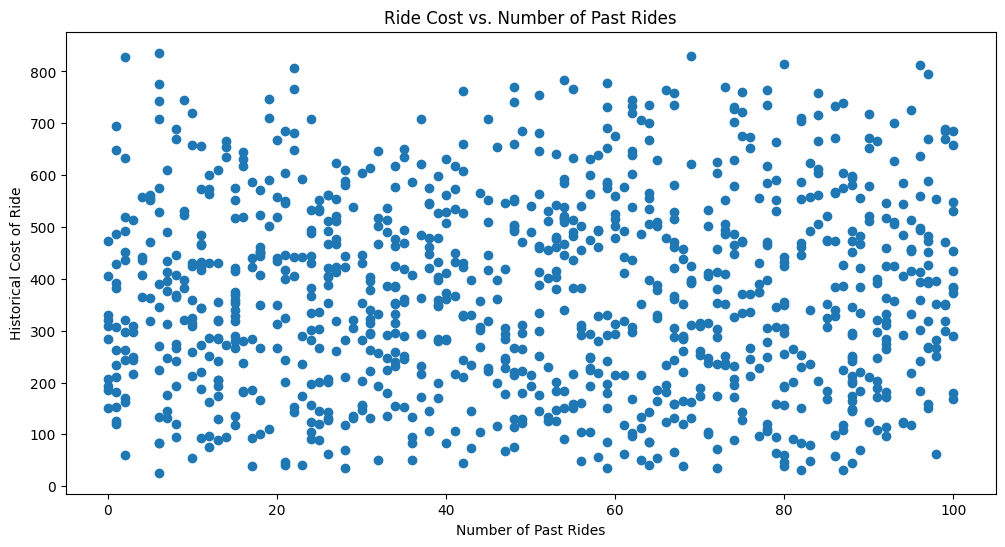

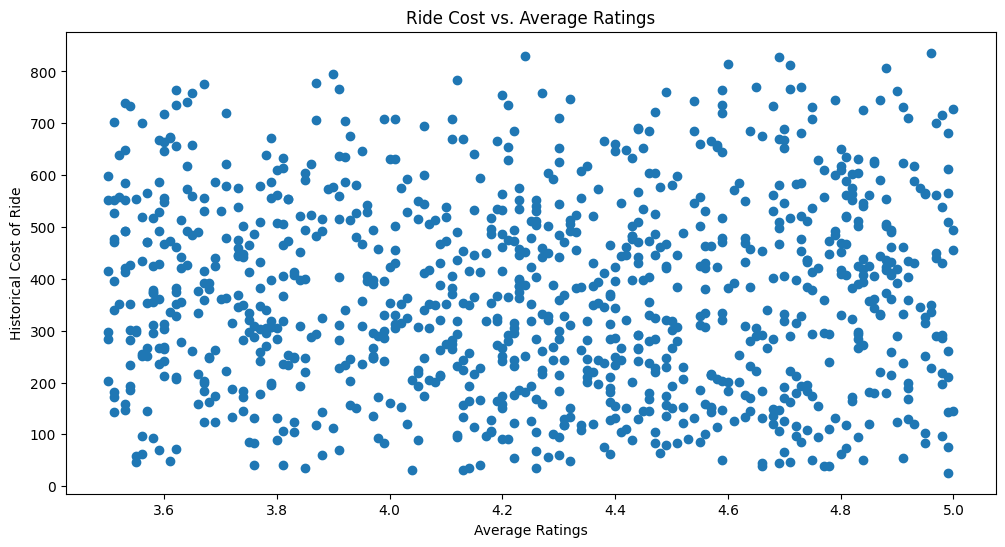

In [15]:
# Analyze the relationship between number of past rides, average ratings, and ride cost
plt.figure(figsize=(12, 6))
plt.scatter(df['Number_of_Past_Rides'], df['Historical_Cost_of_Ride'])
plt.xlabel('Number of Past Rides')
plt.ylabel('Historical Cost of Ride')
plt.title('Ride Cost vs. Number of Past Rides')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['Average_Ratings'], df['Historical_Cost_of_Ride'])
plt.xlabel('Average Ratings')
plt.ylabel('Historical Cost of Ride')
plt.title('Ride Cost vs. Average Ratings')
plt.show()


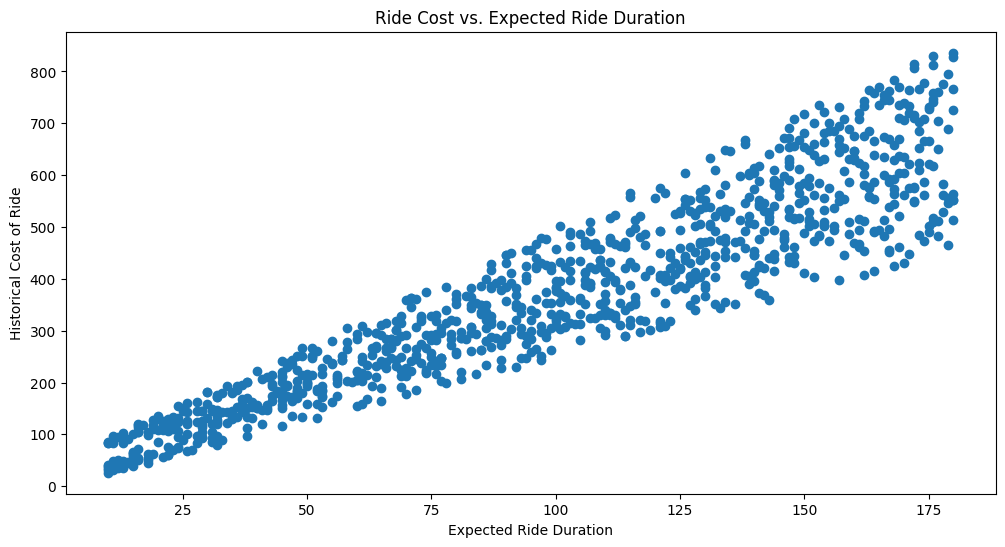

In [16]:
# Analyze the relationship between expected ride duration and ride cost
plt.figure(figsize=(12, 6))
plt.scatter(df['Expected_Ride_Duration'], df['Historical_Cost_of_Ride'])
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.title('Ride Cost vs. Expected Ride Duration')
plt.show()

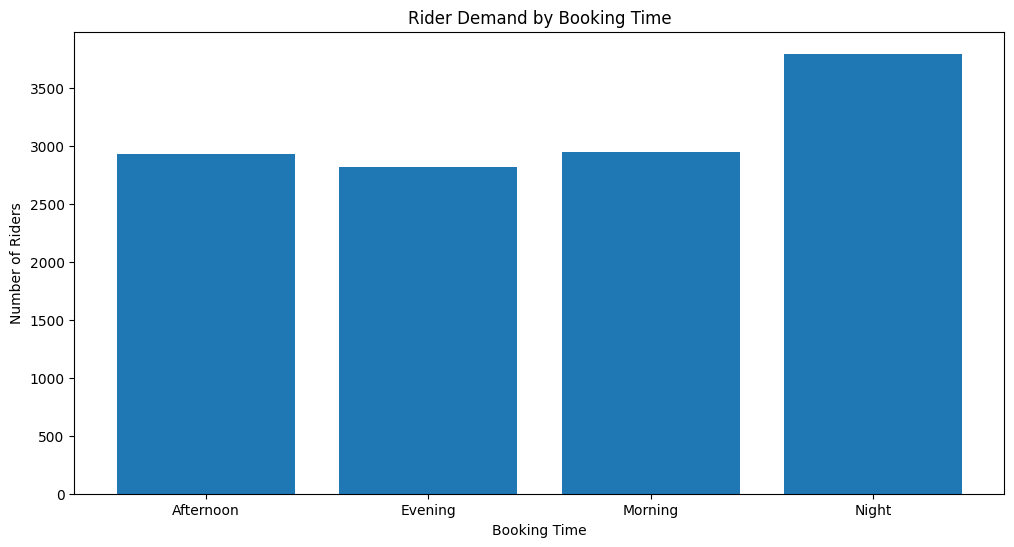

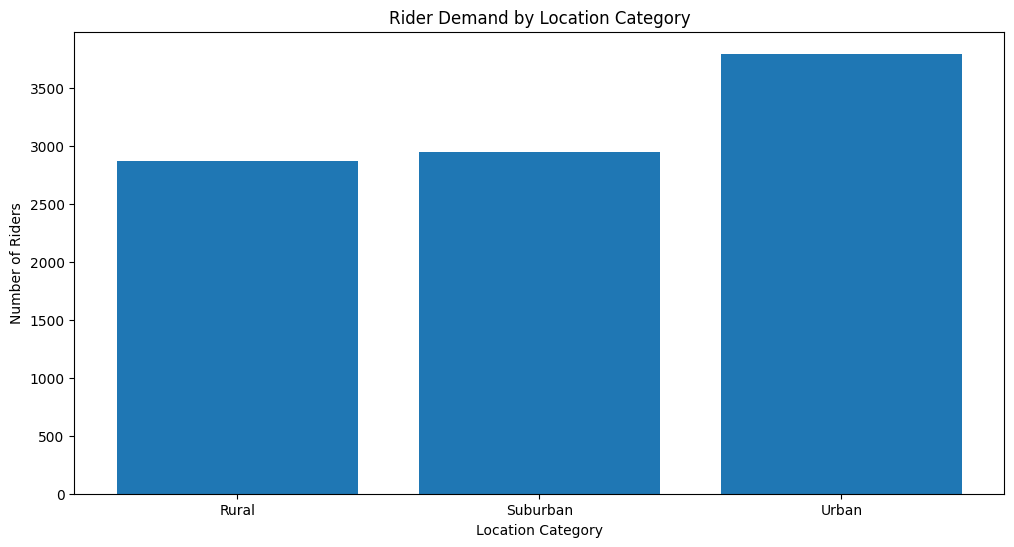

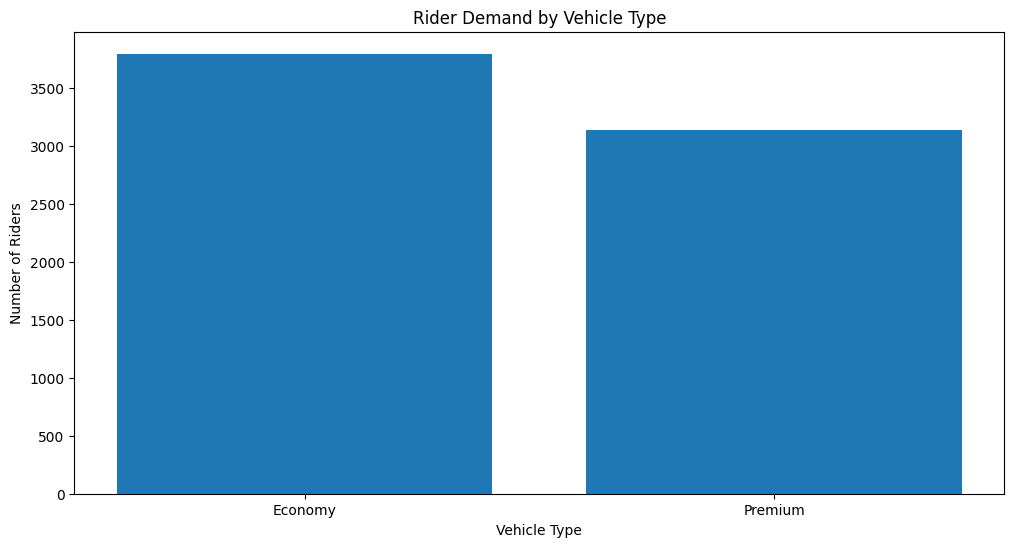

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by booking time, location, and vehicle type, and count the number of riders
rider_demand = df.groupby(['Time_of_Booking', 'Location_Category', 'Vehicle_Type'])['Number_of_Riders'].sum().reset_index()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(rider_demand['Time_of_Booking'], rider_demand['Number_of_Riders'])
plt.xlabel('Booking Time')
plt.ylabel('Number of Riders')
plt.title('Rider Demand by Booking Time')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(rider_demand['Location_Category'], rider_demand['Number_of_Riders'])
plt.xlabel('Location Category')
plt.ylabel('Number of Riders')
plt.title('Rider Demand by Location Category')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(rider_demand['Vehicle_Type'], rider_demand['Number_of_Riders'])
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Riders')
plt.title('Rider Demand by Vehicle Type')
plt.show()